# Convolution Neural Nets for Digit Recognizer

**Importing relevant libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

from sklearn.model_selection import train_test_split as tts

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))        

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Loading data**

In [2]:
traindf = pd.read_csv('../input/digit-recognizer/train.csv')
testdf = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


**Splitting into inputs as X and targets as y**

In [4]:
X = traindf.drop('label', axis = 1).values
y = traindf.label.values

**Reshaping data**

In [5]:
#convert train and test datasets to (num_images, img_rows, img_cols,1)
X = X.reshape(X.shape[0], 28, 28,1)
test_df = testdf.values.reshape(testdf.shape[0], 28, 28,1)

y = y.reshape(-1,1)

# Visualizing handwritten digits

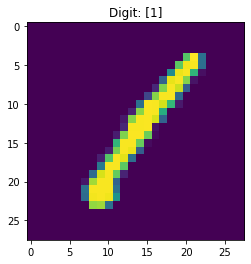

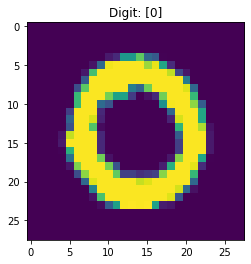

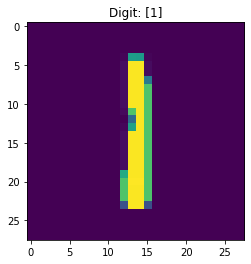

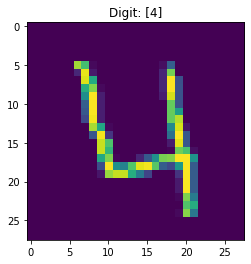

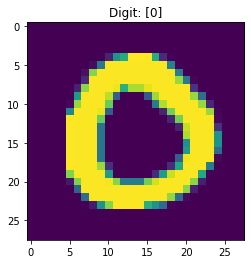

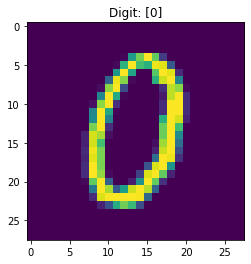

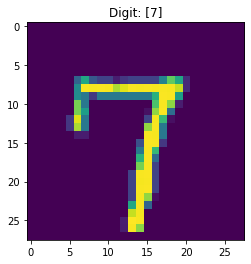

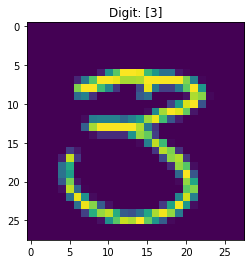

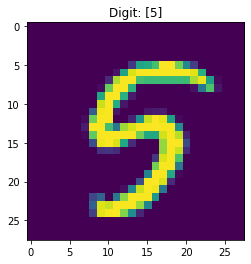

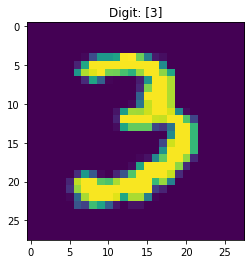

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


for i in range(0,10):
    plt.imshow(X[i]) 
    plt.title(f"Digit: {y[i]}")
    plt.show() 

**Scaling data**

In [7]:
X = X/255
test_df = test_df/255

**Splitting data for training and validation sets using train_test_split**

In [8]:
x_train, x_valid, y_train, y_valid = tts(X,y,test_size = 0.10, random_state = 0, stratify = y )

# Building CNN model

In [9]:
from keras import layers
from keras import models

model = tf.keras.Sequential([
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [10]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [11]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping( 
                    patience = 2, 
                    min_delta = 0.001, 
                    restore_best_weights = True, )

**Training model**

In [13]:
model.fit(x_train,
          y_train,
          epochs = 30, 
          batch_size = 124,
          callbacks = [early_stopping],
          verbose = 1
         )

2022-02-26 10:06:33.343159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
305/305 [==============================] - 14s 41ms/step - loss: 0.4169 - accuracy: 0.8679
Epoch 2/30
305/305 [==============================] - 12s 39ms/step - loss: 0.1064 - accuracy: 0.9682
Epoch 3/30
305/305 [==============================] - 12s 39ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/30
305/305 [==============================] - 13s 41ms/step - loss: 0.0514 - accuracy: 0.9842
Epoch 5/30
305/305 [==============================] - 12s 40ms/step - loss: 0.0435 - accuracy: 0.9868
Epoch 6/30
305/305 [==============================] - 13s 41ms/step - loss: 0.0361 - accuracy: 0.9898
Epoch 7/30
305/305 [==============================] - 12s 40ms/step - loss: 0.0312 - accuracy: 0.9907
Epoch 8/30
305/305 [==============================] - 12s 39ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 9/30
305/305 [==============================] - 12s 41ms/step - loss: 0.0227 - accuracy: 0.9933
Epoch 10/30
305/305 [==============================] - 12s 39ms/step - loss: 0.019

# Evaluating model on validation data

In [14]:
val_loss, val_acc = model.evaluate(x_valid, y_valid)
val_acc

132/132 [==============================] - 1s 6ms/step - loss: 0.0935 - accuracy: 0.9871


0.9871428608894348

**Final Predictions on test data**

In [15]:
#final predictions
predictions = model.predict(test_df, verbose=0)

In [16]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([2, 0, 9, ..., 3, 9, 2])

**Submission**

In [17]:
submissions = pd.DataFrame({"ImageId": list(range(1,test_df.shape[0]+1)),
                         "Label": predictions})

submissions.to_csv("output.csv", index=False)


In [18]:
submissions.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
